In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras.datasets

Using TensorFlow backend.


In [4]:
train = pd.read_csv('D:/ML datasets/IMDB Sentiment Analysis/data/labeledTrainData.tsv',delimiter='\t')
test = pd.read_csv('D:/ML datasets/IMDB Sentiment Analysis/data/testData.tsv',delimiter='\t')

In [5]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [6]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
print(train['review'][0])

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

In [10]:
print(train.isnull().sum(axis=0))

id           0
sentiment    0
review       0
dtype: int64


#No missing values in any column.

In [14]:
print(test.describe())
print(test.columns)

            id                                             review
count    25000                                              25000
unique   25000                                              24801
top     2860_4  Loved today's show!!! It was a variety and not...
freq         1                                                  5
Index(['id', 'review'], dtype='object')


In [26]:
x_train = train['review']
y_train = train['sentiment']
x_test = test['review']


In [27]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [28]:
print(x_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [29]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y_train))

Classes: 
[0 1]


In [32]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(x_train))))

Number of words: 
24904


In [33]:
#Average review length
print('Average Review length: ')
length = [len(x) for x  in x_train]
print('{0}'.format(np.mean(length)))
    


Average Review length: 
1327.71056


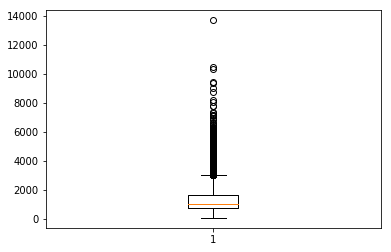

In [35]:
plt.boxplot(length)
plt.show()

In [40]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
def review_to_wordlist( review, remove_stopwords=False ):
        # Function to convert a document to a sequence of words,
        # optionally removing stop words.  Returns a list of words.
        #
        # 1. Remove HTML
        review_text = BeautifulSoup(review).get_text()
        #
        # 2. Remove non-letters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
        #
        # 3. Convert words to lower case and split them
        words = review_text.lower().split()
        #
        # 4. Optionally remove stop words (false by default)
        if remove_stopwords:
            stops = set(stopwords.words("english"))
            words = [w for w in words if not w in stops]
        #
        # 5. Return a list of words
        return(words)

In [42]:
import re
clean_x_train = []
for x in x_train:
    clean_x_train.append(review_to_wordlist(x,True))
x_train = np.asarray(clean_x_train)    
    

C:\Users\shantanu\Anaconda3\envs\deep\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\shantanu\Anaconda3\envs\deep\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [43]:
clean_x_test = []
for x in x_test:
    clean_x_test.append(review_to_wordlist(x,True))
x_test = np.asarray(clean_x_test)    


C:\Users\shantanu\Anaconda3\envs\deep\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\shantanu\Anaconda3\envs\deep\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [46]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

ValueError: invalid literal for int() with base 10: 'stuff'

In [51]:
# load the dataset
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

Exception: URL fetch failure on https://s3.amazonaws.com/text-datasets/imdb.npz: None -- [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [52]:
dic = np.load('D:/ML datasets/IMDB Sentiment Analysis/data/imdb.npz')

In [53]:
type(dic)

numpy.lib.npyio.NpzFile

In [56]:
print(dic.keys())

['x_test', 'x_train', 'y_train', 'y_test']


In [58]:
x_test, x_train, y_train, y_test = [dic[x] for x in dic.keys()]

In [77]:
print(type(x_test), type(x_test[0]))
print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000, 500) (25000, 500) (25000,) (25000,)


In [62]:
print(x_train[0])

[23022, 309, 6, 3, 1069, 209, 9, 2175, 30, 1, 169, 55, 14, 46, 82, 5869, 41, 393, 110, 138, 14, 5359, 58, 4477, 150, 8, 1, 5032, 5948, 482, 69, 5, 261, 12, 23022, 73935, 2003, 6, 73, 2436, 5, 632, 71, 6, 5359, 1, 25279, 5, 2004, 10471, 1, 5941, 1534, 34, 67, 64, 205, 140, 65, 1232, 63526, 21145, 1, 49265, 4, 1, 223, 901, 29, 3024, 69, 4, 1, 5863, 10, 694, 2, 65, 1534, 51, 10, 216, 1, 387, 8, 60, 3, 1472, 3724, 802, 5, 3521, 177, 1, 393, 10, 1238, 14030, 30, 309, 3, 353, 344, 2989, 143, 130, 5, 7804, 28, 4, 126, 5359, 1472, 2375, 5, 23022, 309, 10, 532, 12, 108, 1470, 4, 58, 556, 101, 12, 23022, 309, 6, 227, 4187, 48, 3, 2237, 12, 9, 215]


In [64]:
print(len(x_train[0]), len(x_train[24999]))

138 140


In [66]:
#Truncating or padding the sequences of word 
x_train = sequence.pad_sequences(x_train,maxlen=500,dtype='int32')
x_test = sequence.pad_sequences(x_test,maxlen=500,dtype='int32')

In [67]:
print(x_train.shape)

(25000, 500)


In [69]:
#Model Training
#Formig a MLP with thehelp of Keras Layers, starting with the embedding layer which takes a 2D input array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [70]:
Embedding(5000, 32, input_length=500)

In [72]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [82]:
temp = [x_train[i].max() for i in range(25000)]
print(max(temp))
input_dim = max(temp);

88584


In [87]:
# create the model
model = Sequential()
model.add(Embedding(input_dim+1, 32, input_length=500))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           2834720   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 6,835,221
Trainable params: 6,835,221
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy:{0}".format(scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
 - 99s - loss: 0.5174 - acc: 0.7033 - val_loss: 0.3104 - val_acc: 0.8655
Epoch 2/5
 - 103s - loss: 0.1401 - acc: 0.9484 - val_loss: 0.3162 - val_acc: 0.8696
Epoch 3/5
 - 99s - loss: 0.0186 - acc: 0.9958 - val_loss: 0.3910 - val_acc: 0.8666
Epoch 4/5
 - 100s - loss: 0.0022 - acc: 0.9999 - val_loss: 0.4271 - val_acc: 0.8692
Epoch 5/5
 - 96s - loss: 6.5123e-04 - acc: 1.0000 - val_loss: 0.4526 - val_acc: 0.8685
Accuracy:86.848


In [ ]:
#Train a CNN over the data
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# create the model
model = Sequential()
model.add(Embedding(input_dim+1, 32, input_length=500))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           2834720   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 4,838,325
Trainable params: 4,838,325
Non-trainable params: 0
_________________________________________________________________
